# (Dataset Exploration Title)
## by (Omar Shoura)

## Preliminary Wrangling

> Briefly introduce your dataset here.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [115]:
df=pd.read_csv('201902-fordgobike-tripdata.csv')
df.head(1)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No


In [106]:
df.shape[0]

183412

In [116]:
# droping the null values
df.dropna(inplace=True)

In [117]:
# getting the members ages at 2019
df.member_birth_year=df.member_birth_year.astype('int64')
df['member_age']=2019-(pd.to_datetime(df['member_birth_year'],format='%Y').dt.year)

In [118]:
# getting the start time in datetime data type 
df.start_time=pd.to_datetime(df.start_time)

In [119]:
# creating  Month,Day of the week, hour new columns
df['start_month']=df.start_time.dt.strftime('%B')
df['start_day_of_week']=df.start_time.dt.strftime('%A')
df['start_hour']=df.start_time.dt.strftime('%H')

In [120]:
# check for duplicates
df.duplicated().sum()

0

In [112]:
df.shape[0]

174952

In [121]:
#getting the duration in min
df['duration_min']=(df['duration_sec']/60).astype('int64')

In [122]:
# Rearranging the columns in the dataframe and droping unuseful cols
cols_rearrange = ['bike_id', 'start_station_id', 'end_station_id', 'start_station_name', 'end_station_name', 'start_time', 'end_time','start_month','start_day_of_week','start_hour', 'duration_min',
                 'user_type', 'bike_share_for_all_trip','member_age' , 'member_gender']
df = df[cols_rearrange]

In [123]:
# saving the changes to a new csv file for easier analysis
df.to_csv('new_df.csv',index=False)

In [124]:
df=pd.read_csv('new_df.csv')
df.head()

,bike_id,start_station_id,end_station_id,start_station_name,end_station_name,start_time,end_time,start_month,start_day_of_week,start_hour,duration_min,user_type,bike_share_for_all_trip,member_age,member_gender
0,4902,21.0,13.0,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,2019-02-28 17:32:10.145,2019-03-01 08:01:55.9750,February,Thursday,17,869,Customer,No,35,Male
1,5905,86.0,3.0,Market St at Dolores St,Powell St BART Station (Market St at 4th St),2019-02-28 12:13:13.218,2019-03-01 05:24:08.1460,February,Thursday,12,1030,Customer,No,47,Male
2,6638,375.0,70.0,Grove St at Masonic Ave,Central Ave at Fell St,2019-02-28 17:54:26.010,2019-03-01 04:02:36.8420,February,Thursday,17,608,Subscriber,No,30,Other
3,4898,7.0,222.0,Frank H Ogawa Plaza,10th Ave at E 15th St,2019-02-28 23:54:18.549,2019-03-01 00:20:44.0740,February,Thursday,23,26,Subscriber,Yes,45,Male
4,5200,93.0,323.0,4th St at Mission Bay Blvd S,Broadway at Kearny,2019-02-28 23:49:58.632,2019-03-01 00:19:51.7600,February,Thursday,23,29,Subscriber,No,60,Male


In [168]:
#this shows that all trips are in Feb
df.start_month.value_counts()

February    174952
Name: start_month, dtype: int64

### What is the structure of your dataset?

The data has 183412 rows and 174952 rows after droping the NaN values and 16 coloumns

### What is/are the main feature(s) of interest in your dataset?

The subscribers vs the customers, start and end sations , trips duration , age and sex for the customers

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

We have all features ready to explore after some edits

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

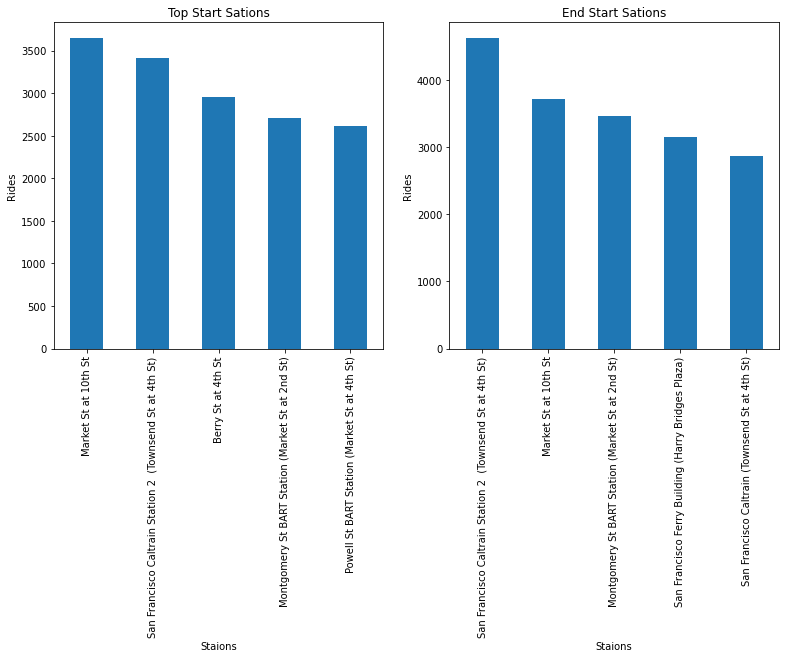

In [216]:
# getting the top start and end staions with trip counts
fig=plt.figure(figsize=[13,6])
plt.subplot(1,2,1)
tp_strt_st=df.start_station_name.value_counts()[:5]
tp_strt_st.plot(kind='bar')
plt.xlabel('Staions')
plt.title('Top Start Sations')
plt.ylabel('Rides')

plt.subplot(1,2,2)
tp_end_st=df.end_station_name.value_counts()[:5]
tp_end_st.plot(kind='bar')
plt.xlabel('Staions')
plt.ylabel('Rides')
plt.title('End Start Sations');

Here we saw the top start and end stations the top two sations are the same in each case

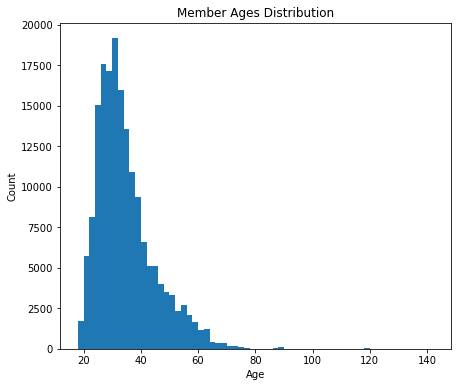

In [29]:
bins=np.arange(18,df.member_age.max()+2,2)
plt.figure(figsize=[7,6])
plt.hist(df.member_age,bins=bins)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Member Ages Distribution');

- The members ages are mostly between 20-40

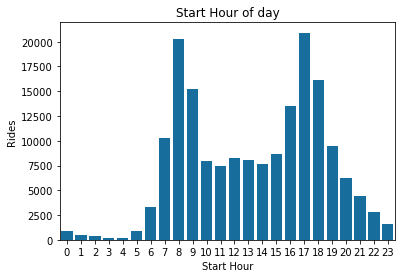

In [215]:
base_color=sb.color_palette('colorblind')[0]
sb.countplot(data=df,x='start_hour',color=base_color)
plt.title('Start Hour of day')
plt.xlabel('Start Hour')
plt.ylabel('Rides');

- The rush hours are at 8 Am and 5 PM

<Figure size 720x360 with 0 Axes>

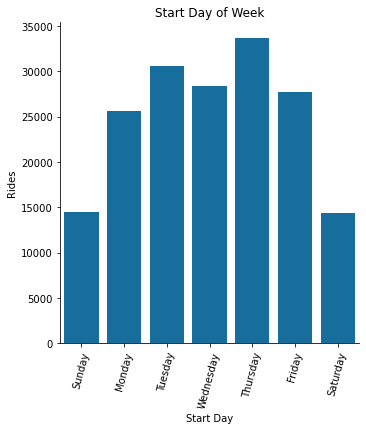

In [214]:
week_days=['Sunday','Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
plt.figure(figsize=[10,5])
sb.catplot(data=df,x='start_day_of_week',order=week_days,kind='count',color=base_color)
plt.title('Start Day of Week')
plt.xticks(rotation=75)
plt.xlabel('Start Day')
plt.ylabel('Rides');

It shows here that tuesday and thursday have the most trips

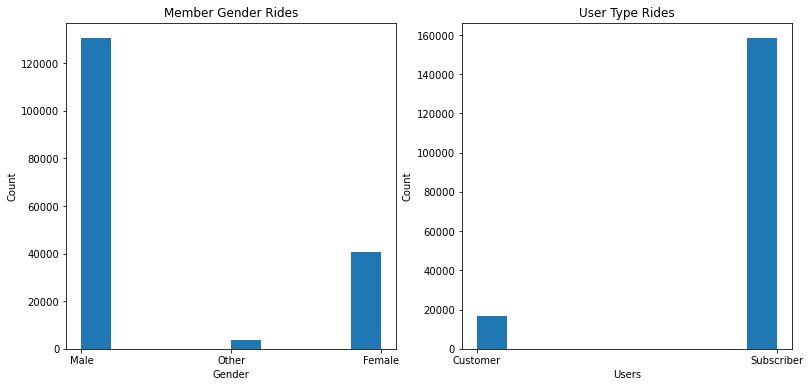

In [174]:
#visualizing the users type and gender distributions
fig=plt.figure(figsize=[13,6])
plt.subplot(1,2,1)
plt.hist(df.member_gender)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Member Gender Rides')

plt.subplot(1,2,2)
plt.hist(df.user_type)
plt.xlabel('Users')
plt.ylabel('Count')
plt.title('User Type Rides');

Most of the customer are male subscribers

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

- For the stations we have top two stations are the same for both start and end stations
- The members ages are mostly between 20-40
- The rush hours are at 8 Am and 5 PM
- Top days are tuesday and thursday have the most trips
- Most of the customer are male subscribers

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

I performed some cleaning and tuning to get the users ages and remove the records with missing values also to get the trip duration in minutes instead of seconds and created new columns for start month,day of the week and hour. other than that the dataset in tidy

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

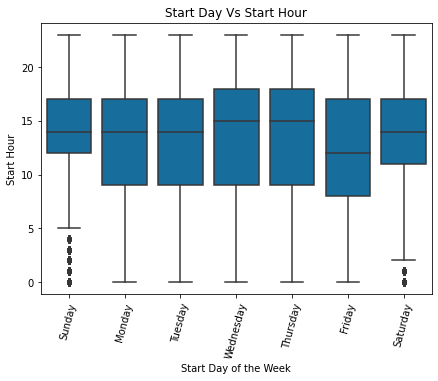

In [211]:
plt.figure(figsize=[7,5])
sb.boxplot(data=df,x='start_day_of_week',y='start_hour',color=base_color,order=week_days)
plt.xticks(rotation=75)
plt.title('Start Day Vs Start Hour')
plt.xlabel('Start Day of the Week')
plt.ylabel('Start Hour');

Here it shows that the mean hour during the week is at 3 PM 

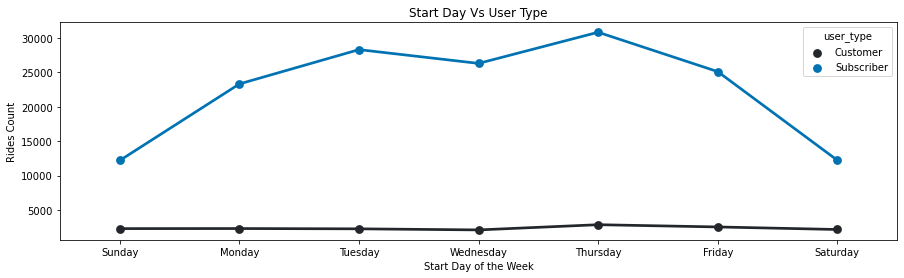

In [128]:
plt.figure(figsize=[15,4])
strt_w_day_vs_usr_typ_df = df.groupby(['start_day_of_week', 'user_type']).size().reset_index()
g=sb.pointplot(data=strt_w_day_vs_usr_typ_df,hue='user_type',y=0,x='start_day_of_week',color=base_color,kind='count',order=week_days)
# g.fig.suptitle('Subscribers Vs Customers',y=1.05)
plt.title('Start Day Vs User Type')
plt.ylabel('Rides Count')
plt.xlabel('Start Day of the Week');

Like the previous plot showed the distribution for all members (Subcribers and Customers) during the week and the peaks for subscribers are on Thursday and Tuesday and it shows that customers peak is on Thursday.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

- For the rides start hour it's around 3 PM through the whole week that might be for a reason like the end of work day fo employees.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

- For the total rides number for customers it has a peak on thursday which might be for a specific reason

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

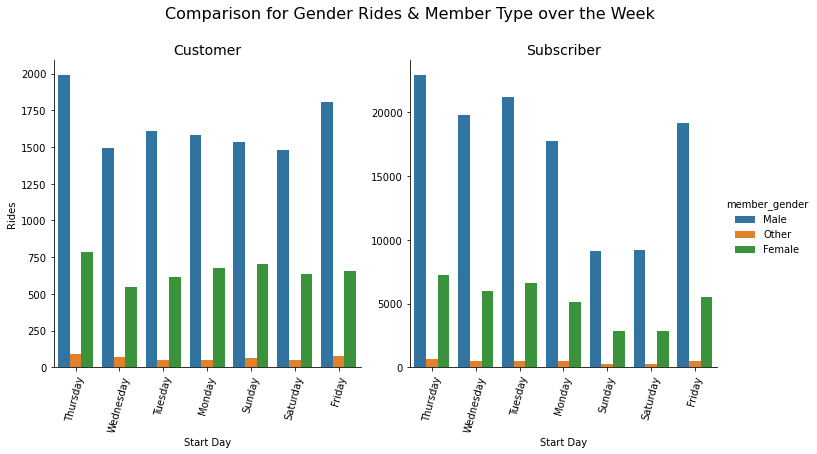

In [222]:
g=sb.catplot(data=df,hue='member_gender',x='start_day_of_week',col='user_type',kind='count',sharey=False)
g.set_xticklabels(rotation=75)
g.fig.suptitle('Comparison for Gender Rides & Member Type over the Week',y=1.08,fontsize=16)
g.set_titles('{col_name}',size=14)
g.set_axis_labels('Start Day','Rides');

As we saw many times before the male subscribers are the most users and the peaks are during Thursday and Tuesday this confirms all the previous insights we got.

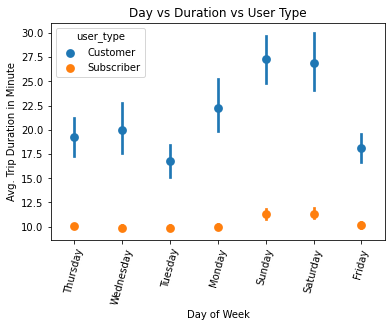

In [223]:
sb.pointplot(data=df, x='start_day_of_week', y='duration_min', hue='user_type' , linestyles="");
plt.xlabel('Day of Week');
plt.ylabel('Avg. Trip Duration in Minute')
plt.xticks(rotation=75)
plt.title('Day vs Duration vs User Type');

Here it's very clear that customers take longer rides than subscribers that means they use it for a specific reason that might mean it's for long distance.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

- The rides peaks are consistant throughout all the visualizations which are on Thursday and Tuesday
- The Male Subscribers are the dominant users with the highest number of rides over the week

### Were there any interesting or surprising interactions between features?

- The customers' ride duration is higher than the subscriber which wasn't expected as the through all the previous plots we saw that the subscriber have more rides than customers.
- All the observations matches with our insights form the previous visualizations.